In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('bankchurn.csv')

data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [27]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:

data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Gender_Male          0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [31]:
data = data.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [57]:

data = pd.get_dummies(data = data ,columns=['Gender', 'Geography'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreTable,SalarybyProduct,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,3,101348.880,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,112542.580,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,2,37977.190,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,4,46913.315,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,79084.100,1,0,0,0,1


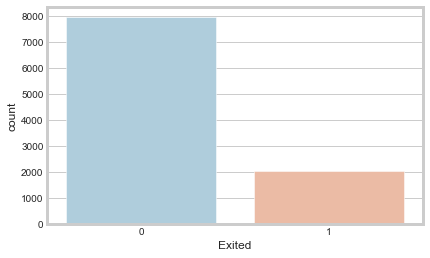

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=data,palette='RdBu_r');

In [5]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

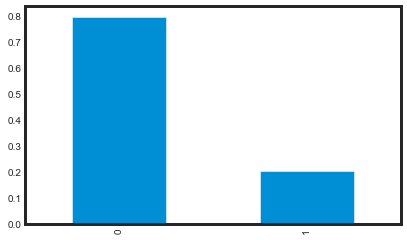

In [7]:
target_pcts = data.Exited.value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

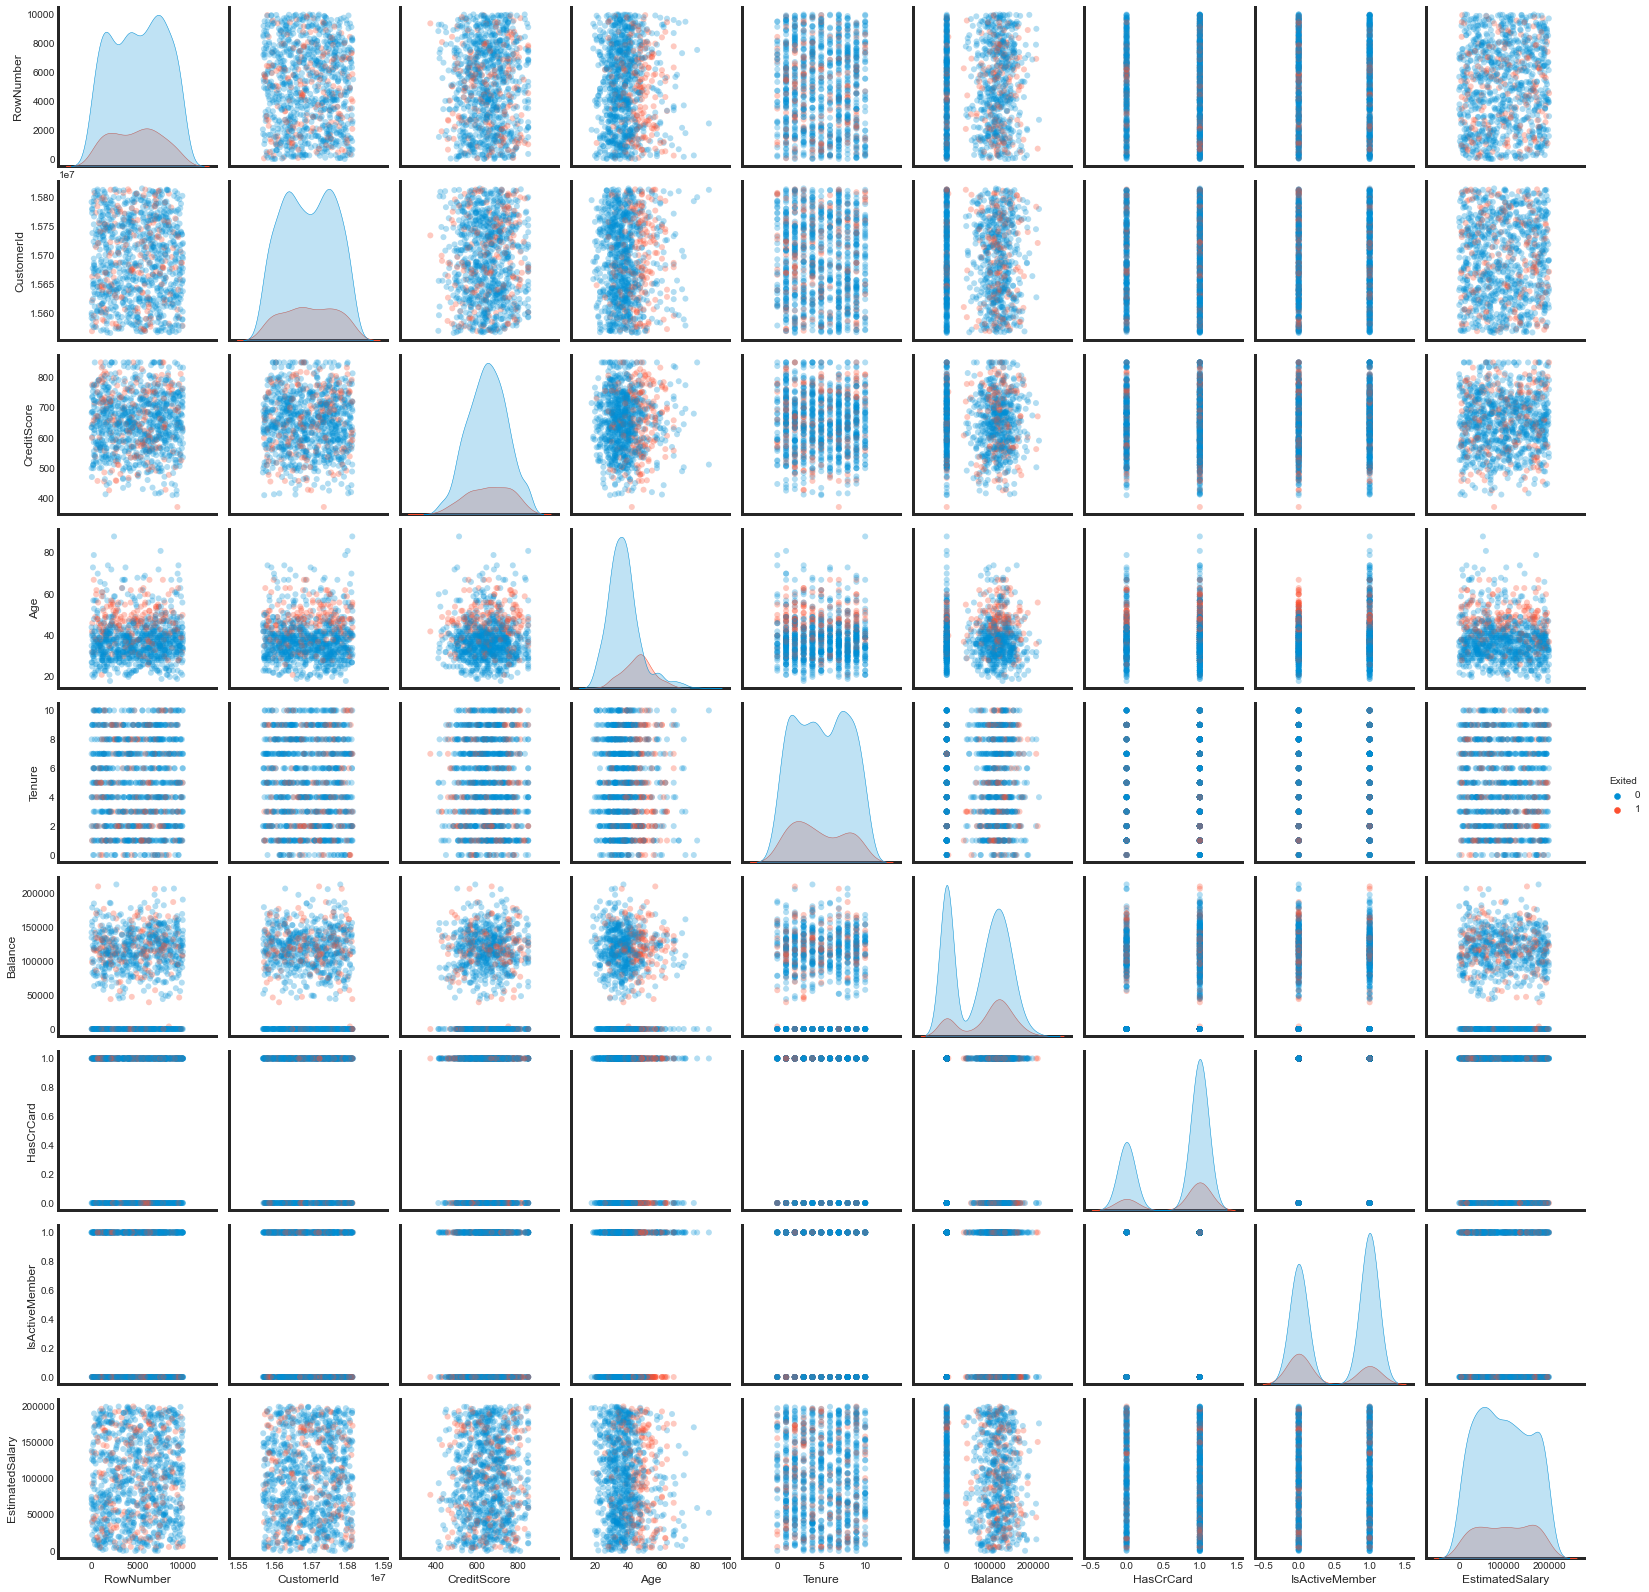

In [30]:
def plot_features(data2, sample_size=500):
    
    sample = (data2.drop(['Gender','Geography','NumOfProducts'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='Exited', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(data2)

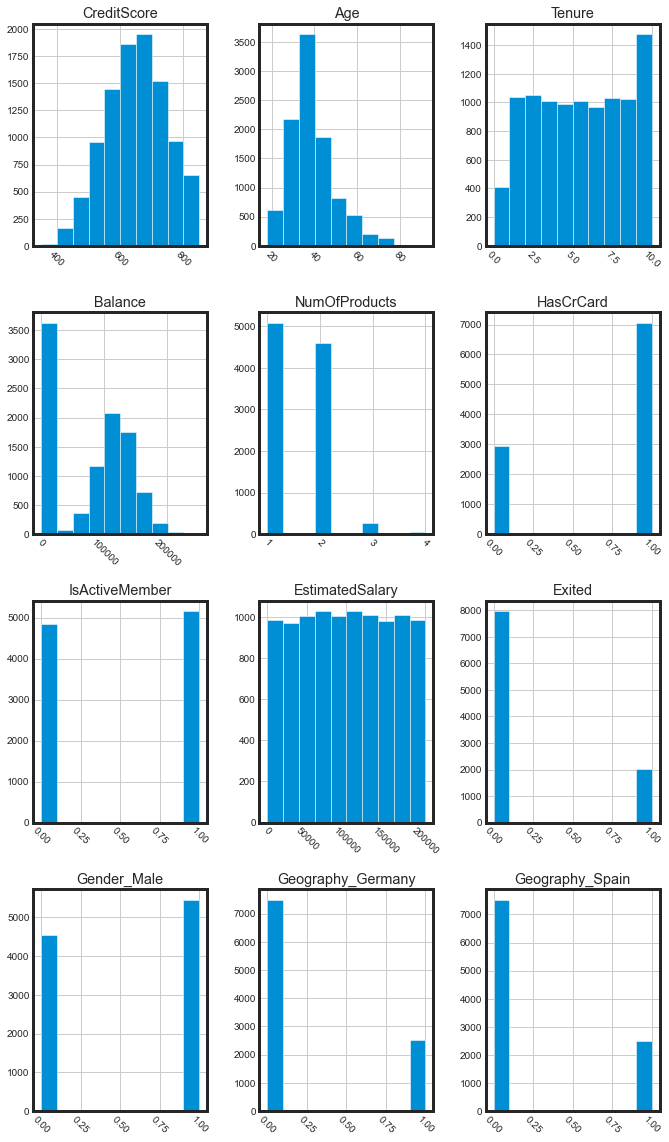

In [13]:

data.hist(figsize=(10,20), xrot=-45)
plt.show()

/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stay_one/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in a

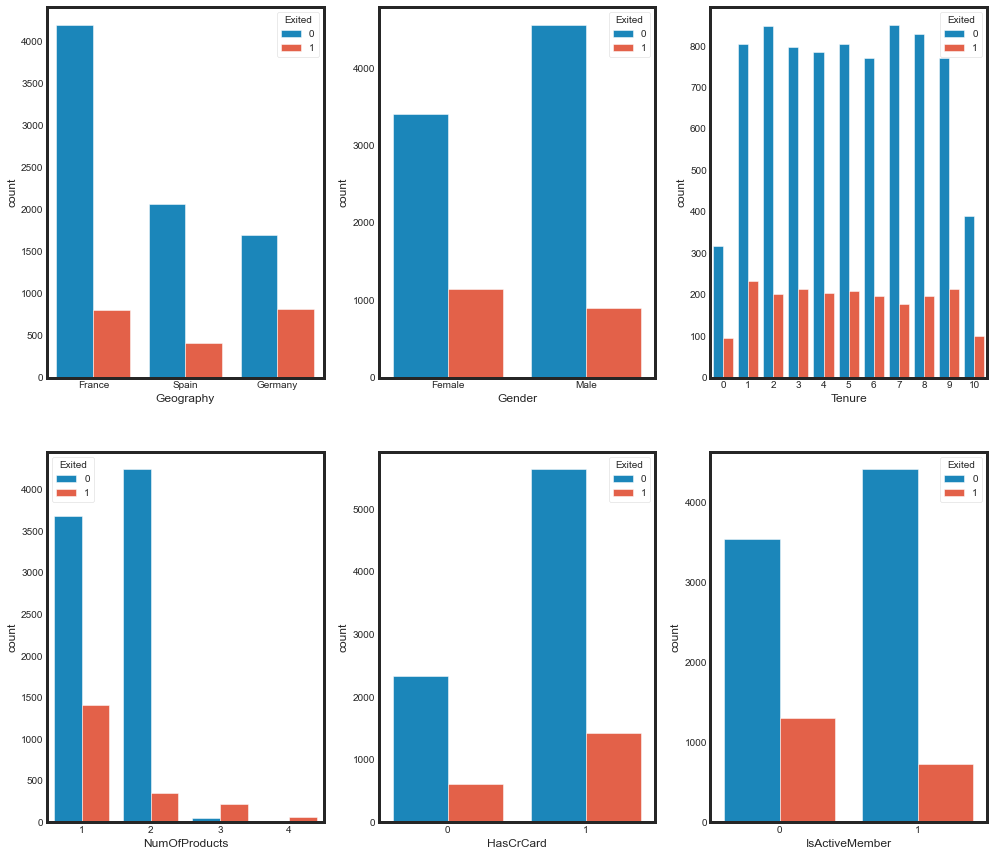

In [18]:
#Churn Vs Non-Churn by Feature
fig, axarr = plt.subplots(2, 3, figsize=(15, 15))
sns.countplot('Geography', hue = 'Exited',data = data2, ax = axarr[0][0])
sns.countplot('Gender', hue = 'Exited',data = data2, ax = axarr[0][1])
sns.countplot('Tenure', hue = 'Exited',data = data2, ax = axarr[0][2])
sns.countplot('NumOfProducts', hue = 'Exited',data = data2, ax = axarr[1][0])
sns.countplot('HasCrCard', hue = 'Exited',data = data2, ax = axarr[1][1])
sns.countplot('IsActiveMember', hue = 'Exited',data = data2, ax = axarr[1][2]);


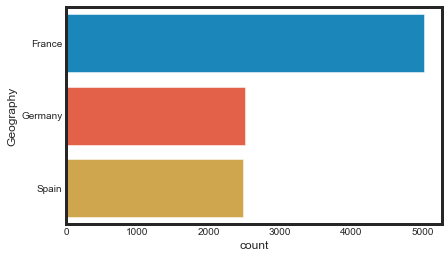

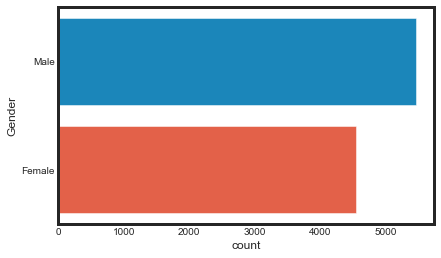

In [22]:

sns.countplot(y=data2['Geography'], data=data2, order = data2['Geography'].value_counts().index)
plt.show()

sns.countplot(y=data2['Gender'], data=data2, order = data2['Gender'].value_counts().index)
plt.show();


<Figure size 360x360 with 0 Axes>

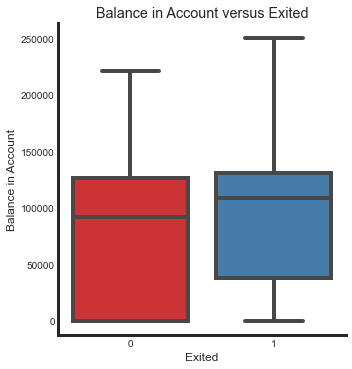

In [24]:
plt.figure(figsize=(5,5));
sns.catplot(data=data2[['Balance','Exited']],x='Exited',y='Balance',kind="box",palette='Set1');
plt.title("Balance in Account versus Exited");
plt.ylabel("Balance in Account");

<Figure size 360x360 with 0 Axes>

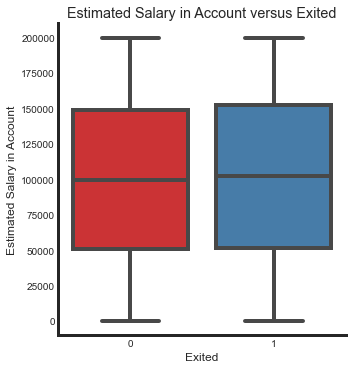

In [25]:
plt.figure(figsize=(5,5))
sns.catplot(data=data2[['EstimatedSalary','Exited']],x='Exited',y='EstimatedSalary',kind="box",palette='Set1');
plt.title("Estimated Salary in Account versus Exited")
plt.ylabel("Estimated Salary in Account");

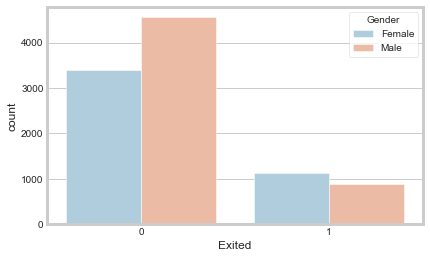

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=data2,palette='RdBu_r');

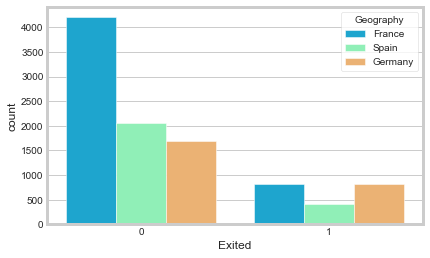

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=data2,palette='rainbow');

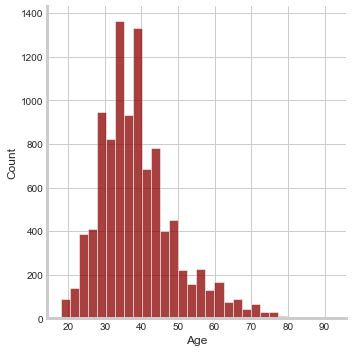

In [35]:
sns.displot(data['Age'].dropna(),kde=False,color='darkred',bins=30)

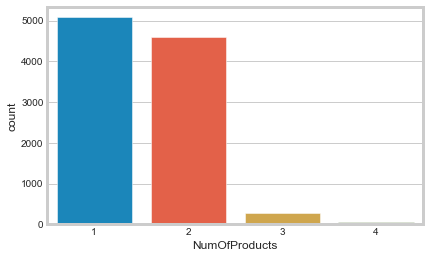

In [36]:
sns.countplot(x='NumOfProducts',data=data);

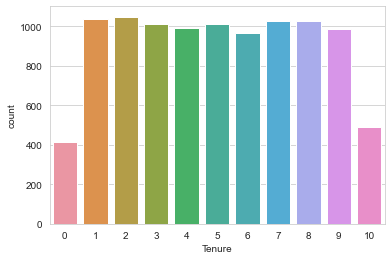

In [17]:
sns.countplot(x='Tenure',data=data);

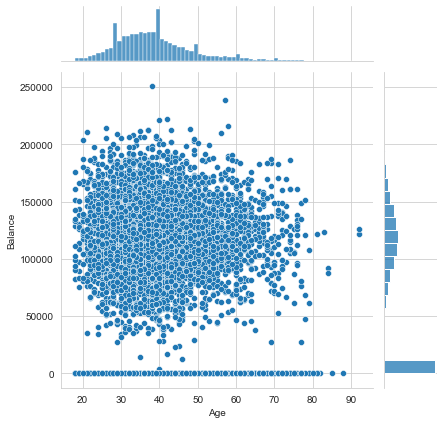

In [18]:
sns.jointplot(x='Age',y='Balance',data=data);

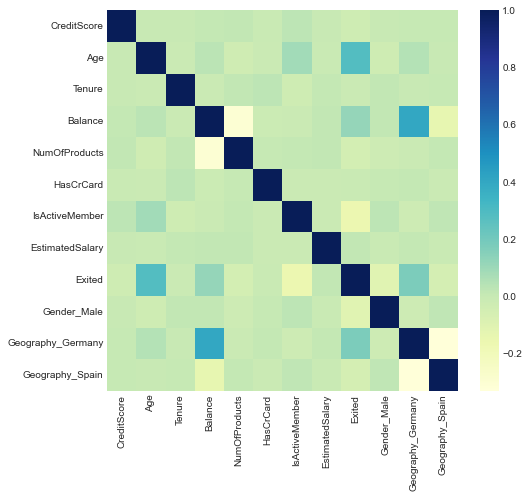

In [23]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), cmap="YlGnBu")
plt.savefig('correlation.png', bbox_inches='tight')

## Feature Engineering Credit Score
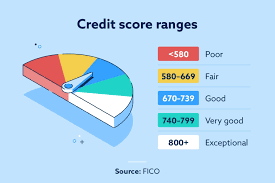

In [38]:
def credit_score_table(row):
    
    credit_score = row.CreditScore
    if credit_score < 580:
        return "0"
    elif credit_score >= 580 and credit_score < 670:
        return "1"
    elif credit_score >= 670 and credit_score < 740:
        return "2"
    elif credit_score >= 740 and credit_score < 799:
        return "3"
    elif credit_score >= 800:
        return "4"
    
data['CreditScoreTable'] = data.apply(lambda row: credit_score_table(row), axis=1)

In [39]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,CreditScoreTable
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,2
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,4


In [40]:
data = pd.get_dummies(data = data ,columns=['CreditScoreTable'], drop_first=True)
data.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,CreditScoreTable_1,CreditScoreTable_2,CreditScoreTable_3,CreditScoreTable_4
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,0,1


In [41]:
data3 = data.drop('CreditScore', axis=1)
data3.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,CreditScoreTable_1,CreditScoreTable_2,CreditScoreTable_3,CreditScoreTable_4
0,42,2,0.00,1,1,1,101348.88,1,0,0,0,1,0,0,0
1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,0,0
2,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0,0,0,0
3,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,1,0,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1,0,0,0,1


In [42]:
data3.to_csv('bankchurnFeatureEngine.csv', index=False)